# Explore the dwca format

In [1]:
from dwca.read import DwCAReader
from dwca.darwincore.utils import qualname as qn

import pandas as pd
from pathlib import Path

import json

import matplotlib.pyplot as plt
import numpy as np

In [2]:
occurrences_path = Path("/home/george/codes/gbif-request/data/classif/mini/0013397-241007104925546.zip")

In [3]:
with DwCAReader(occurrences_path) as dwca:
    print(dwca.metadata)

<Element '{eml://ecoinformatics.org/eml-2.1.1}eml' at 0x7f100ef60770>


In [4]:
dwca = DwCAReader(occurrences_path)

In [5]:
row = dwca.get_corerow_by_position(0)

Exploration first

In [27]:
lengths = []
for row in dwca:
    lengths+= [len(row.extensions)]

In [28]:
min(lengths), max(lengths)

(2, 11)

[]

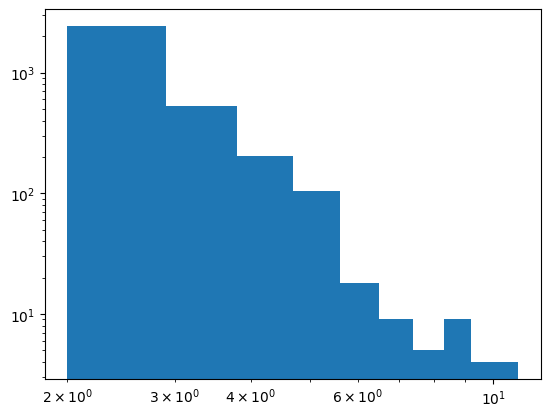

In [32]:
plt.hist(lengths)
plt.loglog()

In [10]:
dwca.extension_files

In [49]:
dwca.core_file.file_descriptor

In [45]:
row.descriptor.__dict__

{'created_from_file': False,
 'raw_element': <Element 'core' at 0x7fb6e8a92160>,
 'represents_corefile': True,
 'represents_extension': False,
 'type': 'http://rs.tdwg.org/dwc/terms/Occurrence',
 'file_location': 'occurrence.txt',
 'file_encoding': 'UTF-8',
 'id_index': 0,
 'coreid_index': None,
 'fields': [{'term': 'http://rs.tdwg.org/dwc/terms/geodeticDatum',
   'index': None,
   'default': 'WGS84'},
  {'term': 'http://rs.gbif.org/terms/1.0/gbifID', 'index': 0, 'default': None},
  {'term': 'http://purl.org/dc/terms/accessRights',
   'index': 1,
   'default': None},
  {'term': 'http://purl.org/dc/terms/bibliographicCitation',
   'index': 2,
   'default': None},
  {'term': 'http://purl.org/dc/terms/language', 'index': 3, 'default': None},
  {'term': 'http://purl.org/dc/terms/license', 'index': 4, 'default': None},
  {'term': 'http://purl.org/dc/terms/modified', 'index': 5, 'default': None},
  {'term': 'http://purl.org/dc/terms/publisher', 'index': 6, 'default': None},
  {'term': 'http:

In [35]:
def pretty_print(d):
    """Pretty print for dictionary.
    """
    d = {k.split('/')[-1]:v for k, v in d.items()}
    print(json.dumps(d, indent=4))

for i in range(len(row.extensions)):
    pretty_print(row.extensions[i].data)

{
    "gbifID": "1703229930",
    "type": "StillImage",
    "format": "image/png",
    "identifier": "https://inaturalist-open-data.s3.amazonaws.com/photos/12141435/original.png",
    "references": "https://www.inaturalist.org/photos/12141435",
    "title": "",
    "description": "",
    "source": "",
    "audience": "",
    "created": "2017-12-01T13:10:51Z",
    "creator": "anita-roberti4",
    "contributor": "",
    "publisher": "iNaturalist",
    "license": "http://creativecommons.org/licenses/by-nc/4.0/",
    "rightsHolder": "anita-roberti4"
}
{
    "gbifID": "1703229930",
    "accessRights": "",
    "bibliographicCitation": "",
    "language": "",
    "license": "http://creativecommons.org/licenses/by-nc/4.0/",
    "modified": "2017-12-03T19:08:22Z",
    "publisher": "",
    "references": "https://www.inaturalist.org/observations/9006574",
    "rightsHolder": "anita-roberti4",
    "type": "",
    "institutionID": "",
    "collectionID": "",
    "datasetID": "",
    "institutionCod

In [38]:
pretty_print(row.data)

{
    "geodeticDatum": "WGS84",
    "gbifID": "1703229930",
    "accessRights": "",
    "bibliographicCitation": "",
    "language": "",
    "license": "CC_BY_NC_4_0",
    "modified": "2017-12-03T19:08:22Z",
    "publisher": "",
    "references": "https://www.inaturalist.org/observations/9006574",
    "rightsHolder": "anita-roberti4",
    "type": "",
    "institutionID": "",
    "collectionID": "",
    "datasetID": "",
    "institutionCode": "iNaturalist",
    "collectionCode": "Observations",
    "datasetName": "iNaturalist research-grade observations",
    "ownerInstitutionCode": "",
    "basisOfRecord": "HUMAN_OBSERVATION",
    "informationWithheld": "",
    "dataGeneralizations": "",
    "dynamicProperties": "",
    "occurrenceID": "https://www.inaturalist.org/observations/9006574",
    "catalogNumber": "9006574",
    "recordNumber": "",
    "recordedBy": "anita-roberti4",
    "recordedByID": "",
    "individualCount": "",
    "organismQuantity": "",
    "organismQuantityType": "",

In [41]:
len(list(row.data.keys())), len(list(row.extensions[-1].data.keys()))

(224, 190)

In [43]:
for k in row.extensions[-1].data.keys():
    if k not in list(row.data.keys()):
        print(k.split('/')[-1])

associatedMedia
country
minimumElevationInMeters
maximumElevationInMeters
minimumDepthInMeters
maximumDepthInMeters
verbatimCoordinates
verbatimLatitude
verbatimLongitude
scientificNameAuthorship


Create a downloader file : merge occurrence and multimedia metadata in a Python dictionary

In [7]:
keys_mult = [
    # "gbifID",
    "type",
    "format",
    "identifier",
    "references",
    "created",
    "creator",
    "publisher",
    "license",
    "rightsHolder"
]

keys_occ = [
    "gbifID",

    # Recording metadata
    "basisOfRecord",
    "recordedBy",
    "continent",
    "countryCode",
    "stateProvince",
    "county",
    "municipality",
    "locality",
    "verbatimLocality",
    "decimalLatitude",
    "decimalLongitude",
    "coordinateUncertaintyInMeters", 
    "eventDate",
    "eventTime",

    # Copyrights metadata
    # "license",
    # "rightsHolder",


    # Individual metadata
    "sex",

    # Taxon metadata
    "acceptedNameUsageID", 
    "scientificName", 
    "kingdom", 
    "phylum", 
    "class", 
    "order", 
    "family", 
    "genus",
    "specificEpithet",
    "taxonRank",
    "taxonomicStatus",

    # Storage metadata
    "taxonKey",
    "acceptedTaxonKey",
    "datasetKey",
    "kingdomKey",
    "phylumKey",
    "classKey",
    "orderKey",
    "familyKey",
    "genusKey",
    "speciesKey",
    ]

keys_file = [
    "filename"
]

# Check if all the keys above are in the row metadata
row_keys = [k.split('/')[-1] for k in list(row.data.keys())]
for k in keys_occ:
    if k not in row_keys:
        print(k)

In [8]:
row.extensions[0].data

{'http://rs.gbif.org/terms/1.0/gbifID': '4953154697',
 'http://purl.org/dc/terms/type': 'StillImage',
 'http://purl.org/dc/terms/format': 'image/jpeg',
 'http://purl.org/dc/terms/identifier': 'https://inaturalist-open-data.s3.amazonaws.com/photos/182833891/original.jpeg',
 'http://purl.org/dc/terms/references': 'https://www.inaturalist.org/photos/182833891',
 'http://purl.org/dc/terms/title': '',
 'http://purl.org/dc/terms/description': '',
 'http://purl.org/dc/terms/source': '',
 'http://purl.org/dc/terms/audience': '',
 'http://purl.org/dc/terms/created': '2017-12-02T00:15:43Z',
 'http://purl.org/dc/terms/creator': 'Simon Oliver',
 'http://purl.org/dc/terms/contributor': '',
 'http://purl.org/dc/terms/publisher': 'iNaturalist',
 'http://purl.org/dc/terms/license': 'http://creativecommons.org/licenses/by-nc/4.0/',
 'http://purl.org/dc/terms/rightsHolder': 'Simon Oliver'}

In [9]:
images_metadata = {}

# Add keys for occurrence and multimedia
for k in keys_occ + keys_mult:
    images_metadata[k] = []

for row in dwca:

    # The last element of the extensions is the verbatim and is (almost) a duplicate of row data
    # And is thus not needed.
    extensions = row.extensions[:-1]

    for e in extensions:
        # Do not consider empty URLs
        identifier = e.data['http://purl.org/dc/terms/identifier']

        if identifier != '':
            # Add occurrence metadata
            # This is identical for all multimedia
            for k,v in row.data.items():
                k = k.split('/')[-1]
                if k in keys_occ:
                    images_metadata[k] += [v]

            # Add extension metadata
            for k,v in e.data.items():
                k = k.split('/')[-1]
                if k in keys_mult:
                    images_metadata[k] += [v]

            # Add image name for future download
            # Hashing of the image URL


In [10]:
# Save the metadata

# Solution 1 - with pandas
output_path = occurrences_path.parent / "tmp.parquet"
pd.DataFrame(images_metadata).to_parquet(output_path, engine='pyarrow', compression='gzip')

Remove empty speciesKey and co.

In [7]:
df = pd.read_parquet(path = occurrences_path.parent / "tmp.parquet")

In [ ]:
GBIF_KEYS = [
    "kingdomKey",
    "phylumKey",
    "classKey",
    "orderKey",
    "familyKey",
    "genusKey",
    "speciesKey",
]

df = df.loc[df['speciesKey'].notna() & (df['speciesKey'] != '')]

Remove duplicates

In [6]:
df = pd.read_parquet(path = occurrences_path.parent / "tmp.parquet")

In [13]:
# Remove the duplicates from images_metadata
# if a file is used several times all concerned rows are dropped.

# Solution 1 - no pandas, maybe overly complicated

# from collections import defaultdict

# def list_duplicates(seq):
#     """https://stackoverflow.com/a/5419576
#     """
#     tally = defaultdict(list)
#     for i,item in enumerate(seq):
#         tally[item].append(i)
#     return ((key,locs) for key,locs in tally.items() 
#                             if len(locs)>1)

# print(len(list(list_duplicates(images_metadata['identifier']))[0][1]))



# Solution 2 - pandas, much simpler

df = pd.DataFrame(images_metadata)
# print(df.duplicated(subset='identifier', keep=False).astype(int).sum())
df.drop_duplicates(subset='identifier', keep=False, inplace=True)
print(df.duplicated(subset='identifier', keep=False).astype(int).sum())


0


In [36]:
df.to_parquet(output_path, engine='pyarrow', compression='gzip')

Limit number of download per species

In [14]:
df = pd.read_parquet(path = occurrences_path.parent / "tmp.parquet")

In [15]:
len(df)

4589

In [35]:
max_num_images_per_species = 500
df = df.groupby('taxonKey').filter(lambda x: len(x) <= max_num_images_per_species)

In [33]:
# Get the scientific name of the maximum occurence
# df.iloc[df.groupby('taxonKey').count().idxmax()]
df[df['taxonKey'] == df['taxonKey'].value_counts().idxmax()]['scientificName'].iloc[0]
# df[df['taxonKey'] == df.groupby('taxonKey')['taxonKey'].count().idxmax()]['scientificName'].iloc[0]

'Operophtera brumata (Linnaeus, 1758)'

In [ ]:
df.to_parquet(output_path, engine='pyarrow', compression='gzip')

Download the images

In [6]:
df = pd.read_parquet(path = occurrences_path.parent / "tmp.parquet")

In [8]:
urls = df.identifier
formats = df.format 
species = df.speciesKey
occs = [(u,f,s) for u,f,s in zip(urls, formats, species)]

In [9]:
occs = [(row.identifier, row.format, row.speciesKey) for row in df.itertuples(index=False)]

Check the final df

In [6]:
occ_path = Path("/home/george/codes/gbifxdl/data/classif/mini/0013397-241007104925546.parquet")
df = pd.read_parquet(occ_path)

In [8]:
len(df)

4167

In [7]:
df.head()

,gbifID,basisOfRecord,recordedBy,continent,countryCode,stateProvince,county,municipality,locality,verbatimLocality,...,format,identifier,references,created,creator,publisher,license,rightsHolder,filename,set
0,4953154697,HUMAN_OBSERVATION,Simon Oliver,EUROPE,ES,Andalucía,,,,"Granada, Spain",...,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/182833891,2017-12-02T00:15:43Z,Simon Oliver,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,Simon Oliver,5329da3d961e3896dcd7217a2368a12c16f661db.jpeg,test_ood
1,4953154697,HUMAN_OBSERVATION,Simon Oliver,EUROPE,ES,Andalucía,,,,"Granada, Spain",...,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/182833755,2017-12-02T00:14:34Z,Simon Oliver,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,Simon Oliver,1b905dccc9918e3a4e8960c5a0484e0121ddcf2a.jpeg,test_ood
2,4946438829,HUMAN_OBSERVATION,jmra_royo,EUROPE,ES,Aragón,,,,"44500 Andorra, Teruel, España",...,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/427390547,2024-09-05T15:26:25Z,jmra_royo,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,jmra_royo,0480a3fb8c3d64fa68519e44836e07d51575cd2a.jpeg,0
3,4946438829,HUMAN_OBSERVATION,jmra_royo,EUROPE,ES,Aragón,,,,"44500 Andorra, Teruel, España",...,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/427390556,2024-09-05T15:28:14Z,jmra_royo,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,jmra_royo,cb95f7f2096b0c2a4757c60ae2cb31ba24f495f4.jpeg,3
4,4946438829,HUMAN_OBSERVATION,jmra_royo,EUROPE,ES,Aragón,,,,"44500 Andorra, Teruel, España",...,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/427390557,2024-09-05T15:26:52Z,jmra_royo,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,jmra_royo,cc5c3d3e0767914df15a9da538c49645f1a083eb.jpeg,1
